In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:10<00:00, 162MB/s]
100% 1.06G/1.06G [00:10<00:00, 110MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()


In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

val_ds =  keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [17]:
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3), padding = 'valid', activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128,kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))



In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [19]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
history = model.fit(train_ds, epochs = 10, validation_data = val_ds)

Epoch 1/10
625/625 [==============================] - 73s 111ms/step - loss: 1.3650 - accuracy: 0.5969 - val_loss: 0.5963 - val_accuracy: 0.6880
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.6029 - accuracy: 0.6879 - val_loss: 0.5207 - val_accuracy: 0.7364
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5089 - accuracy: 0.7527 - val_loss: 0.5798 - val_accuracy: 0.6926
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4305 - accuracy: 0.8025 - val_loss: 0.4599 - val_accuracy: 0.8018
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3714 - accuracy: 0.8360 - val_loss: 0.5409 - val_accuracy: 0.7390
Epoch 6/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3009 - accuracy: 0.8739 - val_loss: 0.4911 - val_accuracy: 0.7854
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2196 - accuracy: 0.9107 - val_loss: 0.4571 - val_ac

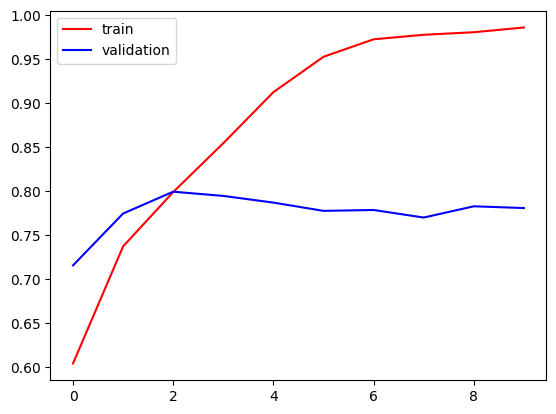

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

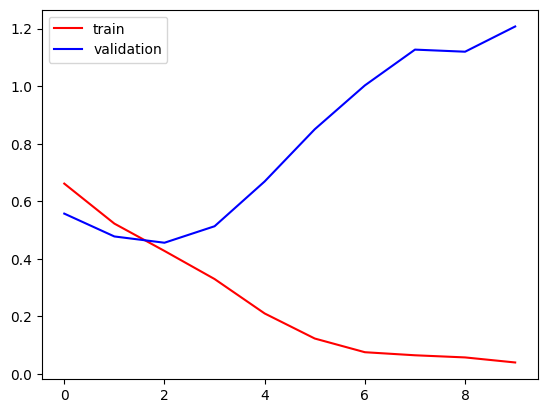

In [13]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [21]:
import cv2

In [22]:
test_img = cv2.imread('/content/dog.jpg')

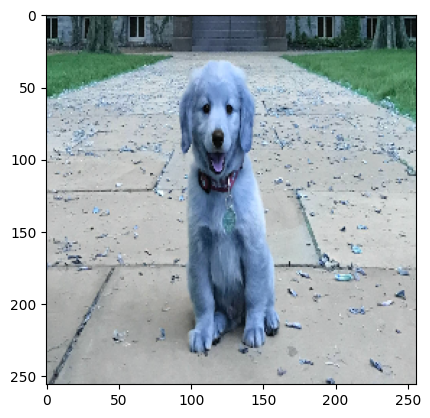

In [27]:
plt.imshow(test_img)

In [24]:
test_img.shape

(1080, 1920, 3)

In [25]:
test_img = cv2.resize(test_img, (256,256))

In [26]:
test_img.shape

(256, 256, 3)

In [28]:
test_input = test_img.reshape((1,256,256,3))


In [29]:
model.predict(test_input)

1/1 [==============================] - 0s 280ms/step


array([[1.]], dtype=float32)